__How to prevent Google Colab from disconnecting?__


```
function ClickConnect(){
  console.log("Connnect Clicked - Start"); 
  document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
  console.log("Connnect Clicked - End"); 
};
setInterval(ClickConnect, 60000)
```

In [1]:
import tensorflow as tf
print(tf.__version__) # find the version number (should be 2.x+)

# 그래피카드 유무 확인 및 메모리 확장 설정
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  print('사용가능한 GPU 갯수: ',len(gpus), '\n')
      
  try:
    # 프로그램이 실행되어 더 많은 GPU 메모리가 필요하면, 텐서플로 프로세스에 할당된 GPU 메모리 
    # 영역을 확장할 수있도록 허용
    tf.config.experimental.set_memory_growth(gpus[0], True)

  except RuntimeError as e:
    # 프로그램 시작시에 접근 가능한 장치가 설정되어야만 합니다
    print(e)

# 설치된 GPU 상세내용 확인
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2.5.0
사용가능한 GPU 갯수:  1 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8541717484654295487
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16183459840
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17503375939513449407
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


## [MNIST Data](http://yann.lecun.com/exdb/mnist/)

- 1998년에 만들어진 필기체 손글씨 숫자(0~9) 데이터셋  
- 60,000개의 트레이닝 이미지와 10,000개의 테스트 이미지로 구성
- 각 숫자이미지는 28x28 크기의 흑백(grayscale) 이미지


> The MNIST Handwritten Digits dataset is considered as the “Hello World” of Computer Vision. 



<img src="https://www.mdpi.com/applsci/applsci-09-03169/article_deploy/html/images/applsci-09-03169-g001.png">


## [Become one with the data](http://karpathy.github.io/2019/04/25/recipe/)

> The first step to training a neural net is to not touch any neural net code at all and instead begin by thoroughly inspecting your data. This step is critical. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
# Download and load the data

(x_train, y_train),(x_test,y_test)=mnist.load_data()

print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
x_train: (60000, 28, 28)
y_train: (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


In [3]:
# Browse raw image data.

np.set_printoptions(linewidth=400, precision=2)
index = np.random.randint(0, x_train.shape[0])

print("True label: ", y_train[index])
print(x_train[index])

True label:  7
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  16 104 141 141 255 178 141 141

### Visual Inspection

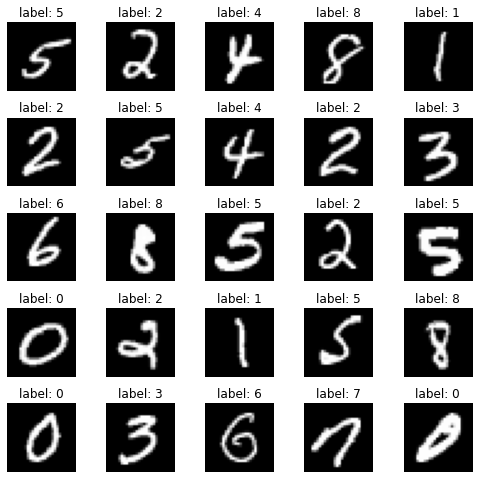

In [4]:
# Randomly sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)

images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(7,7))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.title('label: {}'.format(labels[i]))
    plt.tight_layout()
    plt.axis('off')

### Exploratory Data Analysis

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


<BarContainer object of 10 artists>

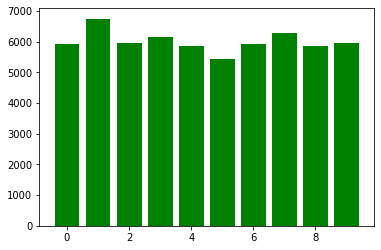

In [5]:
# Exploratory Data Analysis (EDA)

# count and plot the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
y_train_dist = dict(zip(unique, counts))
print("Train labels: ", y_train_dist)
plt.bar(y_train_dist.keys(), y_train_dist.values(), color='g')

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


<BarContainer object of 10 artists>

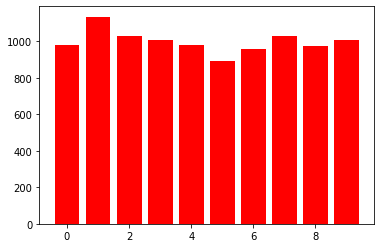

In [6]:
# count and plot the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
y_test_dist = dict(zip(unique, counts))
print("Test labels: ", y_test_dist)
plt.bar(y_test_dist.keys(), y_test_dist.values(), color='r')

##  Baseline Model for MNIST digit Classification

<img src="https://miro.medium.com/max/2200/1*XdCMCaHPt-pqtEibUfAnNw.png">

- Basic Architecture: Two dense layer
    - output_dim = 10 (Number of classes)
    
- Data preprocessing
    - image data reshaping: input_shape of 28x28 = 784   **why? Because the type of layer next to the input layer is dense layer."
    - minmax normalization
    - one-hot encoding for label data

- Architecture Hyperparameter settings
    - No of units for hidden layer: 32
    - Hidden Layer Activation Function: ReLU
    - Loss Function: Categorical Cross-entropy
    - Optimizer: [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)  
        - Default learning rate = 0.001 
    - metrics: accuracy
- Training Hyperparameter Settings
    - Batch size: 128
    - Epochs: 10

In [7]:
# Import libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model

In [8]:
# Step 0: Data Preparation & Data Preprocessing 

(x_train, y_train),(x_test,y_test)=mnist.load_data()
input_size = x_train[0].shape[0]*x_train[0].shape[1]

# While the MNIST data consists of two dimensional tensors, it should be reshaped depending on the type of input layer.

x_train=np.reshape(x_train, [-1,input_size])
x_test=np.reshape(x_test, [-1,input_size])

# normalize
x_train = x_train/255
x_test = x_test/255

# One-hot encoding

y_train = to_categorical(y_train)
y_test= to_categorical(y_test)

print('x_train shape: {} y_train shape: {}'.format(x_train.shape, y_train.shape))
print('x_test shape: {} y_test shape: {}'.format(x_test.shape, y_test.shape))

x_train shape: (60000, 784) y_train shape: (60000, 10)
x_test shape: (10000, 784) y_test shape: (10000, 10)


In [9]:
# Modelling Codes

tf.random.set_seed(42) # for reproducible tensor

input_size = 28*28
hidden_units = 32
output_units = 10 
batch_size = 128
epochs = 10


# Step 1: Model Building
model = Sequential()
model.add(Dense(units=hidden_units, activation='relu', input_dim=input_size))
model.add(Dense(units= output_units, activation='softmax'))

# Step 2: Model Compiling

# Adam use defau1t learning rate of 0.001.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Model Fitting(or Training)
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

# Step 4: Model Evaluation
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print('Testing Accuracy: {:.2f} %'.format(100*accuracy))

Epoch 1/10
469/469 [==============================] - 3s 2ms/step - loss: 0.5063 - accuracy: 0.8590
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2456 - accuracy: 0.9304
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2002 - accuracy: 0.9423
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1714 - accuracy: 0.9507
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1513 - accuracy: 0.9560
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1349 - accuracy: 0.9614
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1218 - accuracy: 0.9645
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1112 - accuracy: 0.9675
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1027 - accuracy: 0.9699
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0953 - accuracy: 0.9725

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


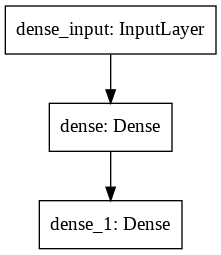

In [10]:
# Visualize model architecture

model.summary()
from IPython.display import display, Image
display(plot_model(model))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5063 - accuracy: 0.8590
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2456 - accuracy: 0.9304
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2002 - accuracy: 0.9423
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1714 - accuracy: 0.9507
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1513 - accuracy: 0.9560
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1349 - accuracy: 0.9614
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1218 - accuracy: 0.9645
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1112 - accuracy: 0.9675
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1027 - accuracy: 0.9699
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0953 - accuracy: 0.9725

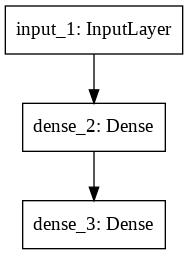

In [11]:
# Same as above, but another way 1

tf.random.set_seed(42) # for reproducible tensor

input_size = 28*28
hidden_units = 32
output_units = 10 
batch_size = 128
epochs = 10

# Step 1: Model Building
model = Sequential()
model.add(InputLayer(input_shape=(input_size,))) # input_shape=input_size okay for 1-dim input tensor
model.add(Dense(units=hidden_units, activation='relu'))
model.add(Dense(units= output_units, activation='softmax'))

# Step 2: Model Compiling
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Model Fitting(or Training)
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

# Step 4: Model Evaluation
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print('Testing Accuracy: {:.2f} %'.format(100*accuracy))

model.summary()
from IPython.display import display, Image
display(plot_model(model))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5063 - accuracy: 0.8590
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2456 - accuracy: 0.9304
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2002 - accuracy: 0.9423
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1714 - accuracy: 0.9507
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1513 - accuracy: 0.9560
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1349 - accuracy: 0.9614
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1218 - accuracy: 0.9645
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1112 - accuracy: 0.9675
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1027 - accuracy: 0.9699
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0953 - accuracy: 0.9725

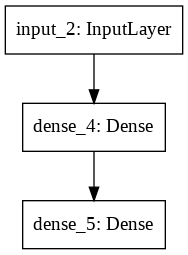

In [12]:
# Same as above, but another way 2 (Functional API)

tf.random.set_seed(42) # for reproducible tensor

input_size = 28*28
hidden_units = 32
output_units = 10 
batch_size = 128
epochs = 10

# Step 1: Model Building
inputs = tf.keras.Input(shape=(input_size,))
x = tf.keras.layers.Dense(hidden_units, activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(output_units, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Step 2: Model Compiling
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Model Fitting(or Training)
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

# Step 4: Model Evaluation
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print('Testing Accuracy: {:.2f} %'.format(100*accuracy))

model.summary()
from IPython.display import display, Image
display(plot_model(model))

## Building blocks of Tensorflow-Keras Modelling

__Keywords in above code cells__

- Sequential
- Dense
- input_dim
- input_shape
- activation
- optimizer
- loss
- metrics
- epochs
- batch_size

이들은 딥러닝의 사용자가 지정해야하는 하이퍼파라미터이며 딥러닝의 중요한 building block 혹은 lego block이라고 할수 있습니다,

### [3 ways to create a Keras model with TensorFlow 2.0](https://www.pyimagesearch.com/2019/10/28/3-ways-to-create-a-keras-model-with-tensorflow-2-0-sequential-functional-and-model-subclassing/)

- Sequential API
  - the easiest way to get up and running with Keras. 
  - But it’s also the most limited -  you cannot create models that:
    - Share layers
    - Have branches (at least not easily)
    - Have multiple inputs
    - Have multiple outputs
- Functional API
  - easy to use and is typically favored by most deep learning practitioners
  - Using the Functional API you can:
    - Create more complex models.
    - Have multiple inputs and multiple outputs.
    - Easily define branches in your architectures (ex., an Inception block, ResNet block, etc.).
    - Design directed acyclic graphs (DAGs).
    - Easily share layers inside the architecture.
  - Furthermore, any Sequential model can be implemented using Keras’ Functional API.

- Model Subclassing
  - Based on OOPs paradigmy
  - Is fully-customizable and enables you to implement your own custom forward-pass of the model
  - Is way harder to utilize than the Sequential API or Functional API.
  

<img src = "https://www.pyimagesearch.com/wp-content/uploads/2019/10/keras_3_model_types_header.png">

### Dense Layer (Fully Connected Layer)

- The name suggests that layers are fully connected (dense) by the neurons in a network layer. Each neuron in a layer receives an input from all the neurons present in the previous layer—thus, they’re densely connected.
- In other words, the dense layer is a fully connected layer, meaning all the neurons in a layer are connected to those in the next layer.

- This is why we __use Flatten layer before passing n-dim data(image) to the next dense layer__.

### [Tensorflow Keras layer의 종류](https://www.tensorflow.org/api_docs/python/tf/keras/layers)
- **Activation**: Applies an activation function to an output.
- **BatchNormalization**: Layer that normalizes its inputs.
- **Conv2D**: 2D convolution layer (e.g. spatial convolution over images)
- **Dropout**: Applies Dropout to the input.
- **Flatten**: Flattens the input. Does not affect the batch size.
- **GRU**: Gated Recurrent Unit - Cho et al. 2014.
- **InputLayer**: Layer to be used as an entry point into a Network (a graph of layers).
- **Long Short-Term Memory layer** - Hochreiter 1997.
- **MaxPool2D**: Max pooling operation for 2D spatial data.
- **ReLU**: Rectified Linear Unit activation function.
- **SimpleRNN**: Fully-connected RNN where the output is to be fed back to input.
- **Softmax**: Softmax activation function.


x_train shape: (60000, 28, 28) y_train shape: (60000, 10)
x_test shape: (10000, 28, 28) y_test shape: (10000, 10)
Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5063 - accuracy: 0.8590
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2456 - accuracy: 0.9304
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2002 - accuracy: 0.9423
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1714 - accuracy: 0.9507
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1513 - accuracy: 0.9560
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1349 - accuracy: 0.9614
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1218 - accuracy: 0.9645
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1112 - accuracy: 0.9675
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1027 - acc

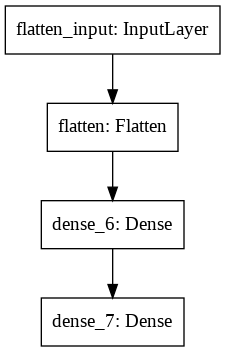

In [13]:
# Data Preparation & Data Preprocessing  with no reshaping.  Instead, use Flatten layer. 

(x_train, y_train),(x_test,y_test)=mnist.load_data()
# While the MNIST data consists of two dimensional tensors, it should be reshaped depending on the type of input layer.
# input_size = x_train[0].shape[0]*x_train[0].shape[1]
# x_train=np.reshape(x_train, [-1,input_size])
# x_test=np.reshape(x_test, [-1,input_size])

# normalize
x_train = x_train/255
x_test = x_test/255


# One-hot encoding

y_train = to_categorical(y_train)
y_test= to_categorical(y_test)

print('x_train shape: {} y_train shape: {}'.format(x_train.shape, y_train.shape))
print('x_test shape: {} y_test shape: {}'.format(x_test.shape, y_test.shape))

# Modelling Codes

tf.random.set_seed(42) # for reproducible tensor

input_size = 28*28
hidden_units = 32
output_units = 10 
batch_size = 128
epochs = 10

# Step 1: Model Building
model = Sequential()
model.add(Flatten()) # model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=hidden_units, activation='relu'))
model.add(Dense(units= output_units, activation='softmax'))

# Step 2: Model Compiling
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Model Fitting(or Training)
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

# Step 4: Model Evaluation
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print('Testing Accuracy: {:.2f} %'.format(100*accuracy))

model.summary()
from IPython.display import display, Image
display(plot_model(model))

### input_dim & input_shape

- input_shape
  - The input shape parameter simply tells the input layer what **the shape of one sample** looks like.

- input_dim
  - Sometimes you just have one dimension – which is the case with one-dimensional / flattened arrays, for example. 
  - In this case, you can also simply use input_dim: specifying **the number of elements within that first dimension only**. 

```
inputs = tf.keras.Input(shape=(input_size,))
model.add(InputLayer(input_shape=(input_size,)))
model.add(Dense(units=hidden_units, activation='relu',input_dim=input_size))
```

### Activation Function

__What is Activation Function?__

It’s just a thing function that you use to get the output of node. It is also known as Transfer Function.

<img src ="https://miro.medium.com/max/816/1*BMSfafFNEpqGFCNU4smPkg.png">

__Why is it used?__

When our brain is fed with a lot of information simultaneously, it tries hard to understand and classify the information into “useful” and “not-so-useful” information. We need a similar mechanism for classifying incoming information as “useful” or “less-useful” in case of NNs.

This is important in the way a network learns because not all the information is equally useful. Some of it is just noise. This is where activation functions come into picture. The activation functions help the network use the important information and suppress the irrelevant data points.

<br/>

__Can we do without an activation function?__

Imagine a neural network without the activation functions. In that case, every neuron will only be performing a linear transformation on the inputs using the weights and biases. Although linear transformations make the neural network simpler, but this network would be less powerful and will not be able to learn the complex patterns from the data.

> A neural network without an activation function is essentially just a linear regression model.

Thus we use a non linear transformation to the inputs of the neuron and this non-linearity in the network is introduced by an activation function.
<br/>

### 1. [Sigmoid or Logistic Activation Function](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid)

The Sigmoid Function curve looks like a S-shape.

$$ f(x) = \frac{1}{1+e^{-x}} = \frac {e^x}{e^x+1} = \frac {1}{2} + \frac {1}{2}tanh( \frac {x}{2}) $$


<img src = "https://miro.medium.com/max/728/1*Xu7B5y9gp0iL5ooBj7LtWw.png">

- Range: [0, 1]
- Therefore, it is especially __used for models where we have to predict the probability as an output.__
- The function is differentiable.
- The function is monotonic but function’s derivative is not.
- The logistic sigmoid function can cause a neural network to get stuck at the training time.


### 2. [Tanh or hyperbolic tangent Activation Function](https://www.tensorflow.org/api_docs/python/tf/keras/activations/tanh)

tanh is also sigmoidal (s - shaped).

$$ tanh(x) = \frac {sinh(x)}{cosh(x)} = \frac {e^x - e^{-x}}{e^x + e^{-x}}$$



<img src = "https://miro.medium.com/max/893/1*f9erByySVjTjohfFdNkJYQ.jpeg">

- Range: [-1, 1] 
- The function is differentiable.
- The function is monotonic while its derivative is not monotonic.
- Both tanh and logistic sigmoid activation functions are used in feed-forward nets.

### 3. [ReLU (Rectified Linear Unit) Activation Function](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)


$$
R(z) =  max(z,0) =
  \begin{cases}
			0, & \text{for $z \lt 0$}\\
      z, & \text{for $z \ge 0$}
	\end{cases}
$$


<img src = "https://miro.medium.com/max/1050/1*XxxiA0jJvPrHEJHD4z893g.png">


- It is __used in almost all the convolutional neural networks__.
- Range: [0, $\infty$]
- The function and its derivative both are monotonic.
- But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly.

### 4. [Leaky ReLU](https://www.tensorflow.org/api_docs/python/tf/nn/leaky_relu)

It is an attempt to solve the dying ReLU problem

$$
R(z) =  max(z,0) =
  \begin{cases}
			az, & \text{for $z \lt 0$}\\
      z, & \text{for $z \ge 0$}
	\end{cases}
$$

The leak helps to increase the range of the ReLU function. Usually, the value of a is 0.01 or so.
When $a$ is not 0.01 then it is called __Randomized ReLU__.

<img src = "https://d1zx6djv3kb1v7.cloudfront.net/wp-content/media/2019/09/Deep-learning-25-i2tutorials.png">

- Range: [ -$\infty$, $\infty$ ]
- Both Leaky and Randomized ReLU functions are monotonic. 
- Also, their derivatives also monotonic in nature.

### 5. [Softmax (multinomial logistic)  Activation Function](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax)

<img src="https://i.stack.imgur.com/Mxpwp.png">

$$ f(x_i) = \frac {e^{x_i}}{\sum_{i}{e^{x_i}}}$$

- The softmax function is a function that turns a vector of K real values into a vector of K real values that sum to 1. 
- Range: [0, 1]
  - The input values can be positive, negative, zero, or greater than one.
  - If one of the inputs is small or negative, the softmax turns it into a small probability. 
  - If an input is large, then it turns it into a large probability.
- It is a more generalized logistic activation function which is used for mutually exclusive multiclass classification.


### Why derivative/differentiation is used ?

When updating the curve, to know in which direction and how much to change or update the curve depending upon the slope. That is why we use differentiation in almost every part of Machine Learning and Deep Learning.

<img src= "https://miro.medium.com/max/1050/1*p_hyqAtyI8pbt2kEl6siOQ.png">


<img src = "https://miro.medium.com/max/1050/1*n1HFBpwv21FCAzGjmWt1sg.png">

###How to Choose a Hidden Layer Activation Function

- A NN will almost always have the same activation function in all hidden layers.
- Most unusual to vary the activation function through a network model.

- Both the sigmoid and Tanh functions can make the model more susceptible to problems during training, via the so-called __vanishing gradients problem__.

- Rough Guidelines
  - Multilayer Perceptron (MLP): ReLU activation function.
  - Convolutional Neural Network (CNN): ReLU activation function.
  - Recurrent Neural Network: Tanh and/or Sigmoid activation function.





In [14]:
import numpy as np
import tensorflow as tf

v= [1,-3,3, 0, -0.5]

__sigmoid or logistic__ activation function

In [15]:
# calculate the sigmoid of a vector

def sigmoid(x):
    s = 1/(1+1/np.exp(x))
    return  s

print(sigmoid(v))

[0.73 0.05 0.95 0.5  0.38]


Text(0.5, 1.0, 'Sigmoid Activation Function')

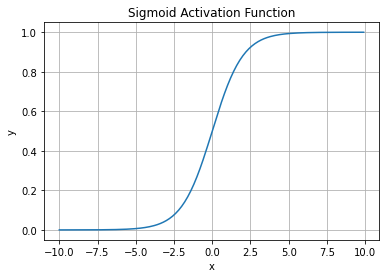

In [16]:
x_val = np.arange(-10,10,0.1)
y_val = sigmoid(x_val)
plt.plot(x_val,y_val)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Sigmoid Activation Function")

__tanh or hyperboic tangent__ activation function

In [17]:
def tanh(x):
    s = np.tanh(x)
    return  s

print(tanh(v))

[ 0.76 -1.    1.    0.   -0.46]


Text(0.5, 1.0, 'Hypertangent Activation Function')

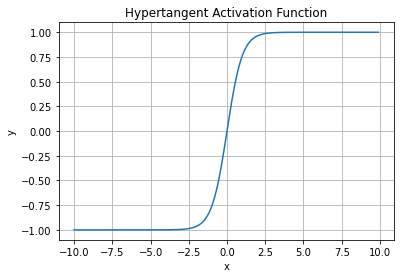

In [18]:
x_val = np.arange(-10,10,0.1)
y_val = tanh(x_val)
plt.plot(x_val,y_val)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Hypertangent Activation Function")

__ReLU__ activation function

In [19]:
def relu(x):
    s = np.maximum(x,0)
    return s

print(relu(v))


[1. 0. 3. 0. 0.]


Text(0.5, 1.0, 'Relu Activation Function')

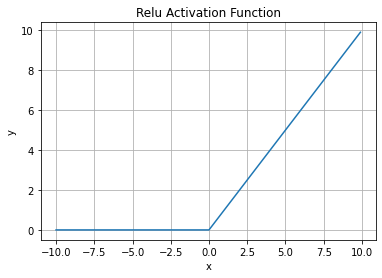

In [20]:
x_val = np.arange(-10,10,0.1)
y_val = relu(x_val)
plt.plot(x_val,y_val)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Relu Activation Function")

__Leaky ReLU__ activation function

In [21]:
def leaky_ReLU(x):
    s = np.where(x > 0, x, x * 0.01)     
    return s

vv = np.array(v)
print (leaky_ReLU(vv))

[ 1.   -0.03  3.    0.   -0.01]


Text(0.5, 1.0, 'leaky_ReLU Activation Function')

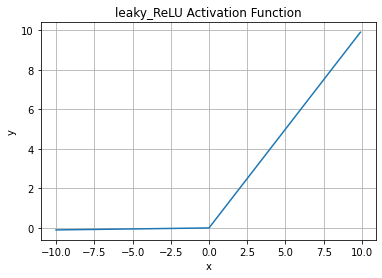

In [22]:
x_val = np.arange(-10,10,0.1)
y_val = leaky_ReLU(x_val)
plt.plot(x_val,y_val)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title("leaky_ReLU Activation Function")

__softmax__ activation function

In [23]:
# calculate the softmax of a vector
def softmax(vector):
    e = np.exp(vector)
    return e / e.sum()
 
# define data
data = [1, 3, 2]
# convert list of numbers to a list of probabilities
result = softmax(data)
# report the probabilities
print(result)
# report the sum of the probabilities
print(sum(result))

[0.09 0.67 0.24]
1.0


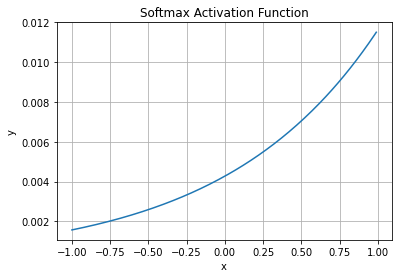

In [24]:
def plot_softmax(start, end, interval):
  x_val = np.arange(start, end, interval)
  y_val = softmax(x_val)
  plt.plot(x_val,y_val)
  plt.grid()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title("Softmax Activation Function")

plot_softmax(-1,1, 0.01)


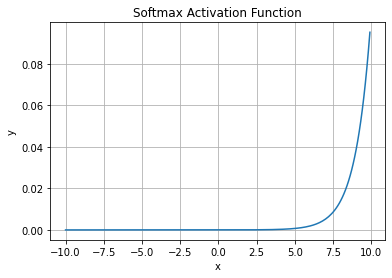

In [25]:
plot_softmax(-10,10, 0.1)


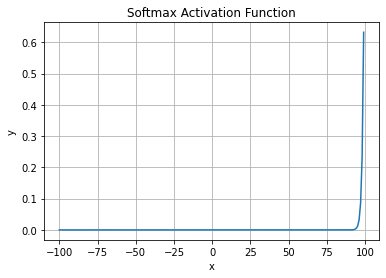

In [26]:
plot_softmax(-100,100,1)

### [Optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

> Optimizers are the engine of machine learning — they make the computer learn.

At every point in time during training, a NN has a certain loss, or error, calculated using a cost function (also referred to as a loss function). This function indicates how ‘wrong’ the network (parameters) is based on the training or validation data. Optimally, the loss would be as low as possible.

<img src="https://miro.medium.com/max/880/1*Y4ng1Yk7jjWFQnwrHJHx_g.png">

Unfortunately, cost functions are nonconvex — they don’t just have one minimum, but many, many local minima.

> To minimize a neural network’s loss, an algorithm called __backpropagation__ is used. Backpropagation calculates the derivative of the cost function with respect to the parameters in the neural network. In other words, it finds the “direction” in which to update the parameters so that the model will perform better. This “direction” is called a neural network’s __gradient__.

__Before updating the model with the gradient, the gradient is multiplied by a learning rate.__ This yields the actual update on the neural network.

  - When the learning rate is too high, we might step over the minimum, meaning the model is not as good as it could have been.
  - But on the other hand, when the learning rate is too low, the optimization process is extremely slow. 
  - Another risk of a low learning rate is the fact that the state might end up in a bad local minimum. The model is at a suboptimal state as this point, but it could be much better.

<img src="https://www.pyimagesearch.com/wp-content/uploads/2019/08/keras_learning_rate_finder_header.png">

> This is where optimizers come in. Most optimizers calculate the learning rate automatically. Optimizers also apply the gradient to the neural network — they make the network learn. A good optimizer trains models fast, but it also prevents them from getting stuck in a local minimum.

Gradient descent is a way to minimize an objective function $J(\theta)$ by updating the model's parameters $\theta$ in the opposite direction of the gradient of the objective function, $\nabla_\theta J(\theta)$, w.r.t. to the parameters. The learning rate $\eta$ determines the size of the steps we take to reach a (local) minimum. In other words, we follow the direction of the slope of the surface created by the objective function downhill until we reach a valley

$${\Huge{\theta} = \theta - \nabla_\theta J(\theta)}$$



- SGD (Stochastic Gradient Descent)
  - It uses just one static learning rate for all parameters during the entire training phase.

- Adagrad (Adaptive Gradient)
  - AdaGrad is very similar to SGD. The key difference in design is that AdaGrad uses Adaptive gradients — it has a different learning rate for every single parameter in the neural network. 
  - AdaGrad updates the learning rate for each parameter based on the frequency with which it’s updated. Frequently updated parameters are trained very carefully with a low learning rate. 

- RMSprop ( Root Mean Square Propagation)
  - AdaGrad has a problem where after a few batches, the learning rates become low — resulting in a long training time. 
  - RMSProp attempts to solve this problem by exponentially decaying the learning rates. 

- Adam (Adaptive Moment estimation)
  - It also uses past learning rates like AdaGrad and RMSProp do. 
  - However, Adam doesn’t stop there—it also uses past gradients to speed up learning. When Adam moves in a certain direction, it does so with a ‘great force’— it’s not suddenly going to stop and turn around.

 <br/> 

<img src="https://miro.medium.com/max/2318/1*LczI-iUPAcHQy3t4lyDw9Q.png">

<img src="https://miro.medium.com/max/2988/1*uUX55zhO5pks4vEKR4j63A.png">

<img src="https://miro.medium.com/max/2312/1*_zSG-oQ-YIG6tDtKEuNoGA.png">

<img src="https://miro.medium.com/max/2992/1*6a4co23xKuRGYcOJIMgwfQ.png">


[An Empirical Comparison of Optimizers for Machine Learning Models](https://heartbeat.fritz.ai/an-empirical-comparison-of-optimizers-for-machine-learning-models-b86f29957050)

In [27]:
# How to set a learning rate

from tensorflow import keras as k
from tensorflow.keras import layers 

model = k.Sequential()
model.add(layers.Dense(64, kernel_initializer='uniform', input_shape=(10,)))
model.add(layers.Activation('softmax'))

opt = k.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

### [Loss Function (Cost Function, Error Function)](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

__Regression Loss Functions__

  - Absolute Error Loss ($L_1$ Loss)

    - 예측치와 실제값의 차이의 절대값

    $$L = \big| y-f(x) \big| \text{  where }f(x) = x\hat{\beta}$$
    
    - $L_2$ Loss Function(손실함수) 사용시 Cost Function(비용함수)는 MAE(Mean Absolute Error, 평균절대오차)로 불린다.    


  - Squared Error Loss ($L_2$ Loss)

    - 예측치와 실제값의 차이의 제곱

    $$L = \big(y-f(x)\big)^2 \text{  where }f(x) = x\hat{\beta}$$    
 
    - $L_2$ Loss Function(손실함수) 사용시 Cost Function(비용함수)는 MSE(Mean Squared Error, 평균제곱오차)로 불린다.    


__Classification Loss Functions__


  - Binary Cross Entropy Loss

    - Binary Classification refers to assigning an object into one of two classes.

    - The cross-entropy loss for output label y (can take values 0 and 1) and predicted probability p is defined as:

$$ L = -y*log(p) - (1-y)* log(1-p) = 
      \begin{cases}
           -log(1-p) & \text{if } y = 0   \\
           -log(p)   & \text{if } y = 1
  \end{cases}$$
        
 - Multi-Class Classification Loss Functions

    - The loss for input vector $X_i$ and the corresponding one-hot encoded target vector $Y_i$ is:

$$ L(X_i, Y_i) = - \sum_{j=1}^{c} y_{ij}*log(p_{ij}) $$


$$ \text{  where  } Y_i \text{ is one-hot encoded target vector } (y_{i1}, y_{i2}, \cdots, y_{ic}) $$

$$  y_{ij} = 
  \begin{cases}
       1 & \text{  if } i_{th} \text{ element in class } j \\
       0 & \text{  otherwise}
  \end{cases} $$ 
$$ p_{ij} = f(X_i) = \text{ probabilty that }i_{th} \text{ element is in class }j $$
                         

[What is Cross-Entropy?](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)

<img src="https://hoya012.github.io/assets/img/ce_kldiv/10.png">

- Information: 주어진 임의의 이벤트에서 발생하는 놀라움의 양
- Entropy: 주어진 임의의 이벤트에서 발생한 Information들의 기대값
- KL divergence: 두 확률 분포 P, Q가 있을 때, P 분포를 - 근사하는 Q 분포를 통해 샘플링할 때 발생하는 정보량의 손실
- Cross entropy: 두 확률 분포 P, Q 사이의 차이를 측정하는 지표

📒 참고 문헌

1. [A Gentle Introduction to Cross-Entropy for Machine Learning](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)

2. [An introduction to entropy, cross entropy and KL divergence in machine learning](https://hoya012.github.io/blog/cross_entropy_vs_kl_divergence/)

3. [Github](https://github.com/sangsin/Introduction-to-Deep-Learning-with-Tensorflow-2.0-and-Keras/blob/aeb1b161cc9aa414748aae09d7085649701b5068/%EC%B0%B8%EA%B3%A0%EC%9E%90%EB%A3%8C/A%20Gentle%20Introduction%20to%20Cross-Entropy%20for%20Machine%20Learning.ipynb)

### [Tensorflow-Keras Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

모델의 유효성 검증을 위한 다양한 통계치

- Accuracy
- BinaryCrossentropy
- CategoricalAccuracy
- CategoricalCrossentropy
- FalseNegatives
- FalsePositives
- MeanAbsoluteError (MAE)
- MeanIoU
- MeanSquaredError (MSE)
- Precision
- Recall
- RootMeanSquaredError
- SparseCategoricalCrossentropy
- TrueNegatives
- TruePositives











### Epochs vs Batch Size vs Iterations 

- **Epochs**

  - One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE

  - 모델을 만들 때 적절한 epoch 값을 설정해야만 underfitting과 overfitting을 방지할 수 있다

  - epoch 값이 너무 작다면 underfitting이 너무 크다면 overfitting이 발생할 확률이 높음

- **batch size**

  - Total number of training examples present in a single batch.
  - batch size는 한 번의 batch마다 주는 데이터 샘플의 size. 여기서 batch(보통 mini-batch라고 표현)는 나눠진 데이터 셋을 의미
  - 메모리의 한계와 속도 저하 때문에 대부분의 경우 한 번의 epoch에 모든 데이터를 집어넣을 수는 없다. 그래서 데이터를 나누어서 주게 되는데 이때 몇 번 나누어서 주는가를 iteration, 각 iteration마다 주는 데이터 사이즈를 batch size라고 한다.

 <img src = "https://mblogthumb-phinf.pstatic.net/MjAxOTAxMjNfMjU4/MDAxNTQ4MjM1Nzg3NTA2.UtvnGsckZhLHOPPOBWH841IWsZFzNcgwZvYKi2nxImEg.CdtqIxOjWeBo4eNBD2pXu5uwYGa3ZVUr8WZvtldArtYg.PNG.qbxlvnf11/20190123_182720.png?type=w800">

